In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
#Load Dataset
df = pd.read_csv("data/studentdata_clean.csv")

In [3]:
df.shape

(999997, 14)

In [4]:
#check Data Structure and Summary Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999997 entries, 0 to 999996
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                999997 non-null  int64  
 1   Gender             999997 non-null  object 
 2   SES_Quartile       999997 non-null  int64  
 3   ParentalEducation  999997 non-null  object 
 4   SchoolType         999997 non-null  object 
 5   TestScore_Math     999997 non-null  float64
 6   TestScore_Reading  999997 non-null  float64
 7   TestScore_Science  999997 non-null  float64
 8   GPA                999997 non-null  float64
 9   AttendanceRate     999997 non-null  float64
 10  StudyHours         999997 non-null  float64
 11  Extracurricular    999997 non-null  int64  
 12  PartTimeJob        999997 non-null  int64  
 13  ParentSupport      999997 non-null  int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 106.8+ MB


In [5]:
num_cols = df.select_dtypes(include=np.number).columns
obj_cols = df.select_dtypes(include='object').columns

print(f'numeric columns: {num_cols} \n')
print(f'object columns: {obj_cols} \n')

numeric columns: Index(['Age', 'SES_Quartile', 'TestScore_Math', 'TestScore_Reading',
       'TestScore_Science', 'GPA', 'AttendanceRate', 'StudyHours',
       'Extracurricular', 'PartTimeJob', 'ParentSupport'],
      dtype='object') 

object columns: Index(['Gender', 'ParentalEducation', 'SchoolType'], dtype='object') 



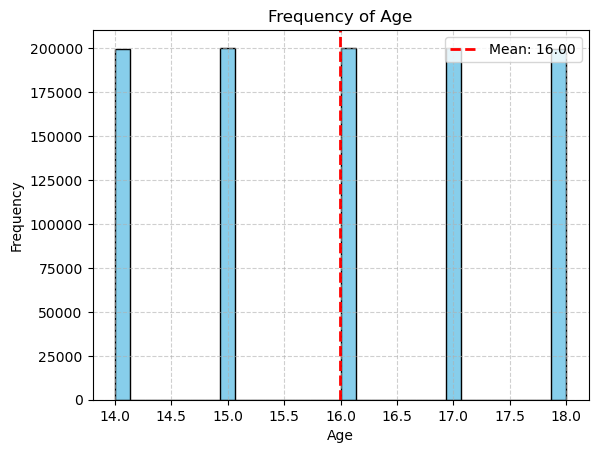


--- Value counts for Age ---
Age
14    199885
15    200395
16    200000
17    200076
18    199641
Name: count, dtype: int64


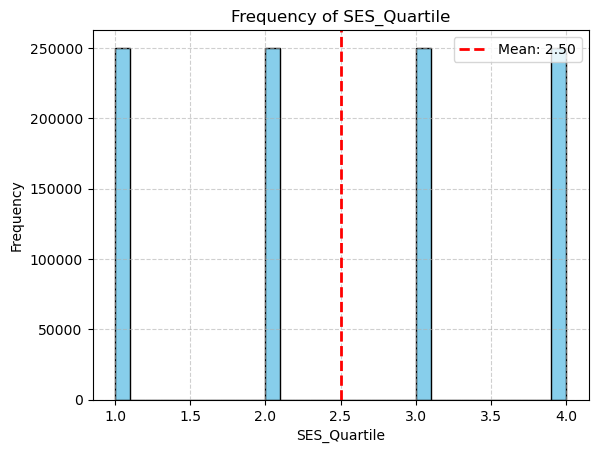


--- Value counts for SES_Quartile ---
SES_Quartile
1    249861
2    249968
3    250193
4    249975
Name: count, dtype: int64


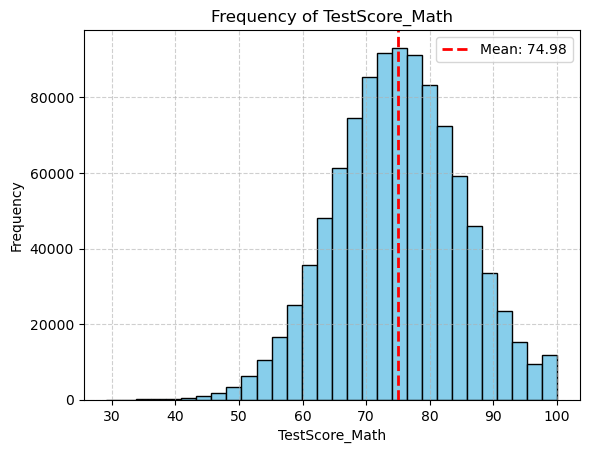


--- Value counts for TestScore_Math ---
TestScore_Math
29.146751        1
29.834308        1
30.056753        1
30.109343        1
30.601797        1
              ... 
99.997826        1
99.997904        1
99.998377        1
99.999944        1
100.000000    6337
Name: count, Length: 993661, dtype: int64


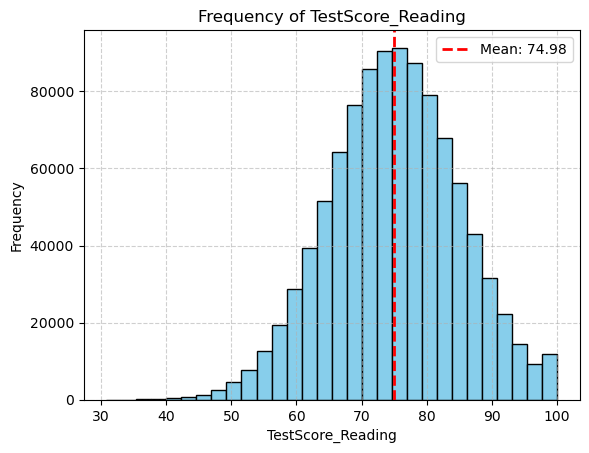


--- Value counts for TestScore_Reading ---
TestScore_Reading
30.796723        1
31.578402        1
31.755472        1
31.962978        1
31.981177        1
              ... 
99.998915        1
99.998949        1
99.999232        1
99.999793        1
100.000000    6303
Name: count, Length: 993695, dtype: int64


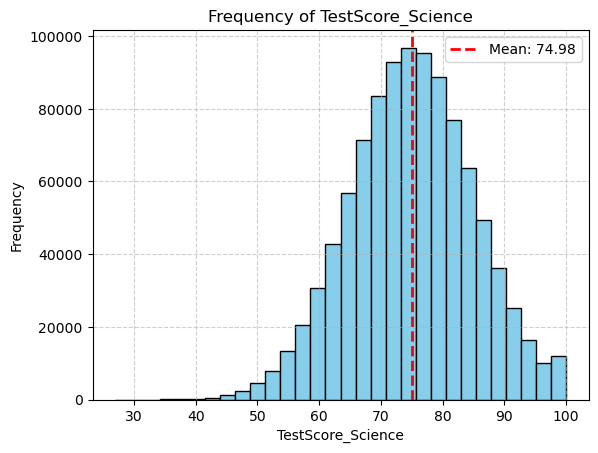


--- Value counts for TestScore_Science ---
TestScore_Science
26.915868        1
27.723524        1
28.027252        1
29.030430        1
29.912715        1
              ... 
99.997150        1
99.997434        1
99.998781        1
99.999498        1
100.000000    6284
Name: count, Length: 993714, dtype: int64


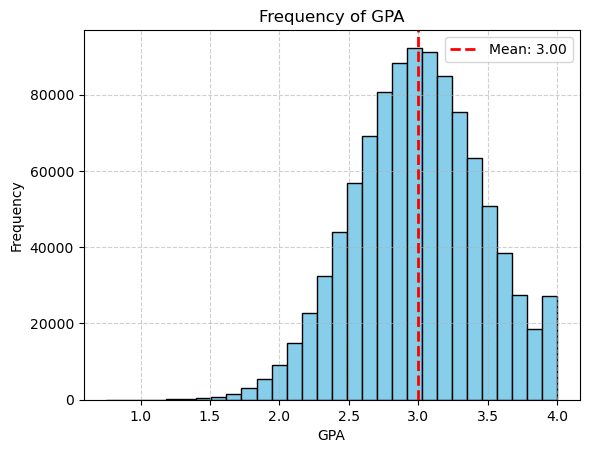


--- Value counts for GPA ---
GPA
0.752867        1
0.781395        1
0.878011        1
0.942017        1
0.944237        1
            ...  
3.999938        1
3.999939        1
3.999942        1
3.999979        1
4.000000    15286
Name: count, Length: 984712, dtype: int64


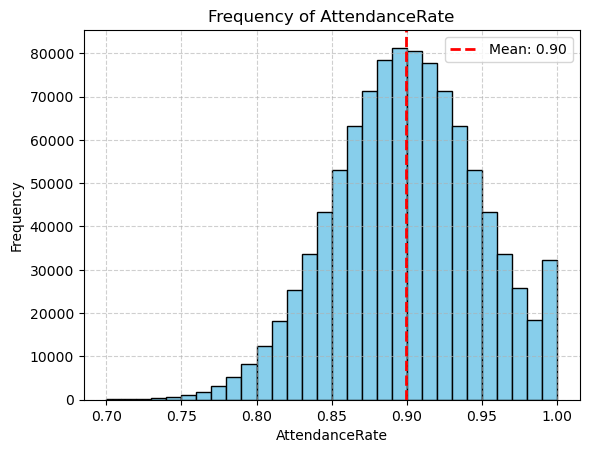


--- Value counts for AttendanceRate ---
AttendanceRate
0.700000       30
0.700250        1
0.701693        1
0.702289        1
0.702645        1
            ...  
0.999998        1
0.999999        1
0.999999        1
0.999999        1
1.000000    19556
Name: count, Length: 980413, dtype: int64


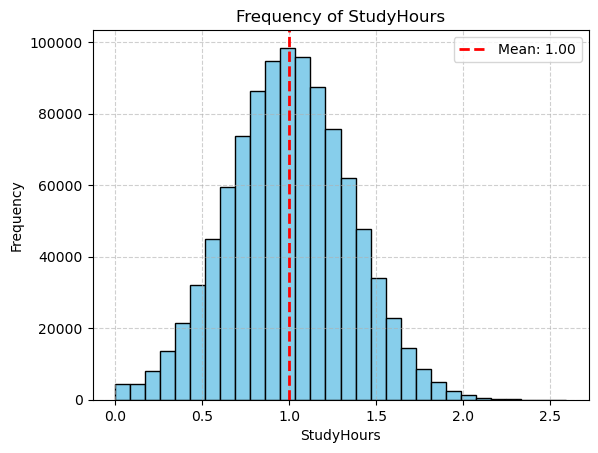


--- Value counts for StudyHours ---
StudyHours
0.000000    2141
0.000043       1
0.000058       1
0.000085       1
0.000092       1
            ... 
2.492485       1
2.518877       1
2.522643       1
2.536784       1
2.590730       1
Name: count, Length: 997857, dtype: int64


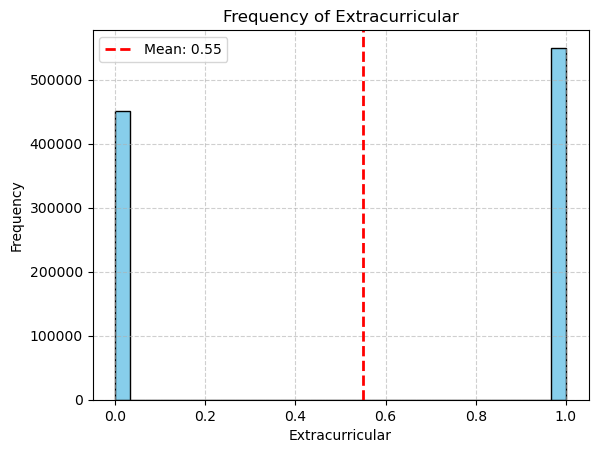


--- Value counts for Extracurricular ---
Extracurricular
0    450190
1    549807
Name: count, dtype: int64


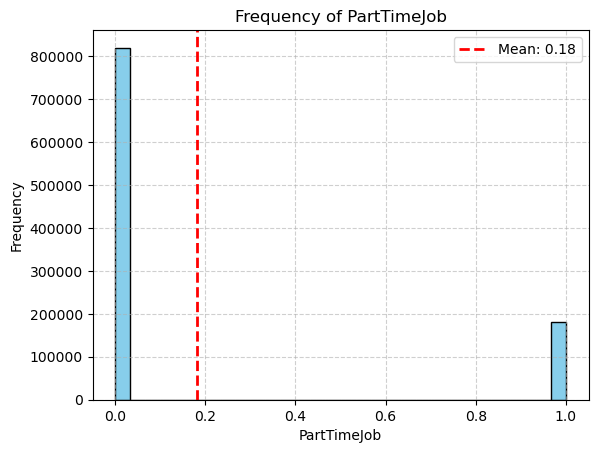


--- Value counts for PartTimeJob ---
PartTimeJob
0    819388
1    180609
Name: count, dtype: int64


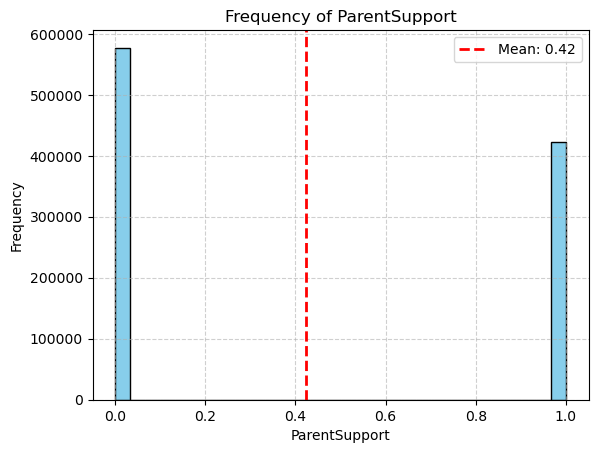


--- Value counts for ParentSupport ---
ParentSupport
0    577226
1    422771
Name: count, dtype: int64


In [6]:
# Numeric columns
for col in num_cols:
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    mean_value = np.mean(df[col])
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {col}')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    print(f"\n--- Value counts for {col} ---")
    print(df[col].value_counts().sort_index())

C:\Users\user\AppData\Local\Temp\ipykernel_12056\2914071469.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


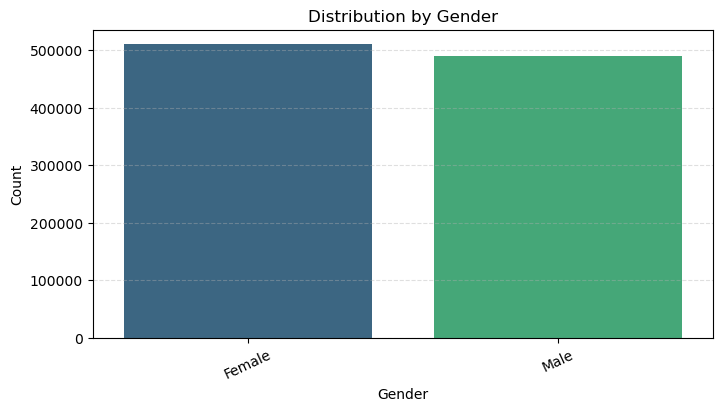


--- Value counts for Gender ---
Gender
Female    510091
Male      489906
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_12056\2914071469.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


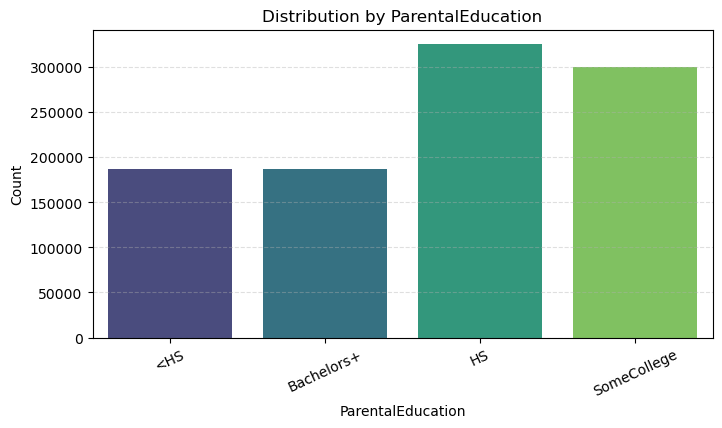


--- Value counts for ParentalEducation ---
ParentalEducation
<HS            186848
Bachelors+     187401
HS             325268
SomeCollege    300480
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_12056\2914071469.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


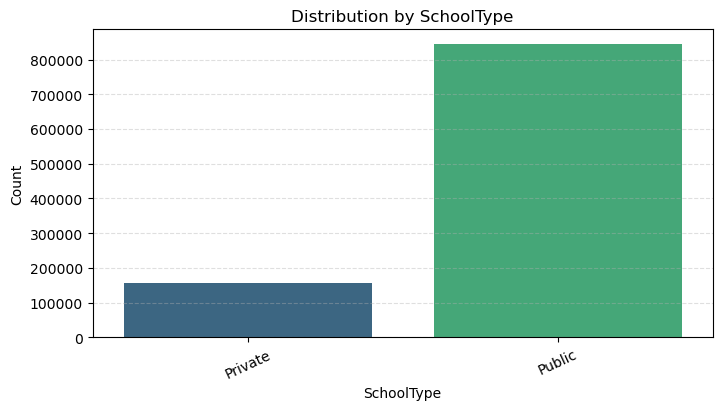


--- Value counts for SchoolType ---
SchoolType
Private    155575
Public     844422
Name: count, dtype: int64


In [7]:
# Object columns
for col in obj_cols:
    if col in df.columns:
        order = df[col].value_counts().sort_index().index  # order by label/index
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, order=order, palette='viridis')
        plt.title(f"Distribution by {col}")
        plt.xticks(rotation=25)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.grid(axis='y', linestyle='--', alpha=0.4)
        plt.show()
        print(f"\n--- Value counts for {col} ---")
        print(df[col].value_counts().sort_index())

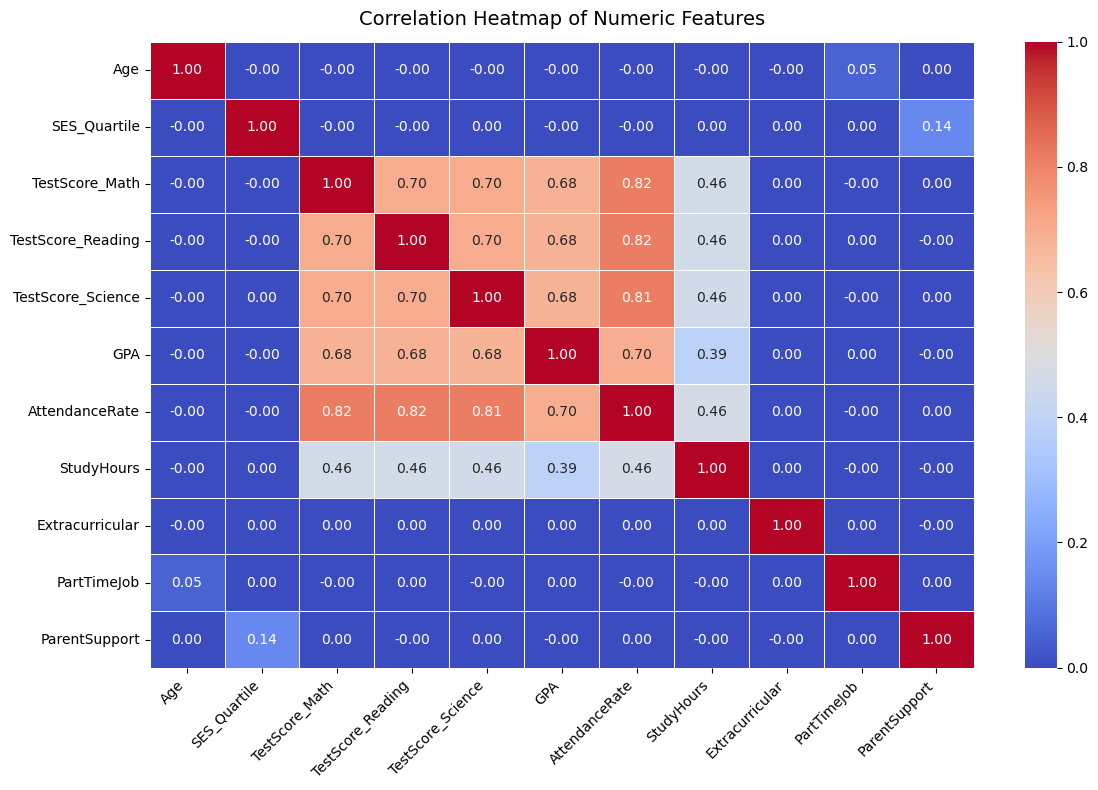

In [8]:
# Correlation heatmap for Numeric Columns
plt.figure(figsize=(12, 8))
corr_matrix = df[num_cols].corr()

sns.heatmap(
    corr_matrix,
    annot=True,          # Show correlation values
    fmt=".2f",           # Limit to 2 decimal places
    cmap="coolwarm",     # Color theme
    linewidths=0.5,      # Space between boxes
    cbar=True
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


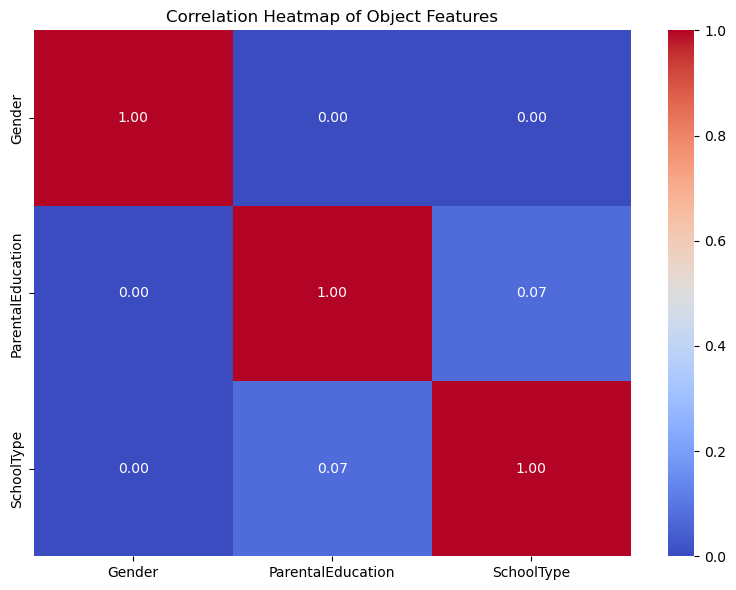

In [9]:
# Correlation Heatmap for Object Columns
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# correlation matrix for categorical variables
cat_corr_matrix = pd.DataFrame(index=obj_cols, columns=obj_cols)

for col1 in obj_cols:
    for col2 in obj_cols:
        cat_corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cat_corr_matrix = cat_corr_matrix.astype(float)
plt.figure(figsize=(8, 6))
sns.heatmap(cat_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Object Features")
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12056\399920532.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='GPA', palette='Set2')


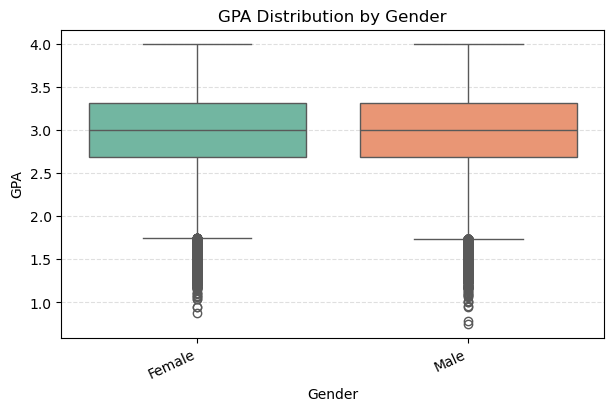

C:\Users\user\AppData\Local\Temp\ipykernel_12056\399920532.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='GPA', palette='Set2')


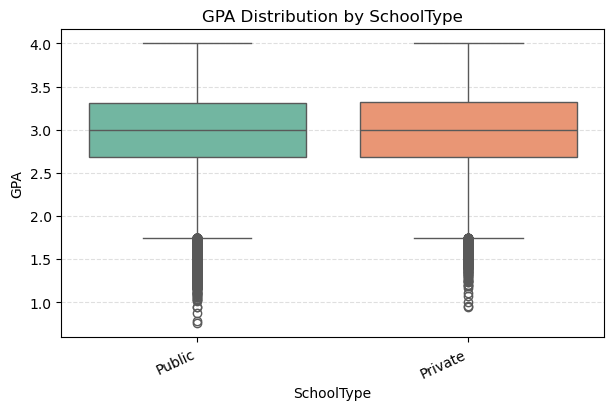

C:\Users\user\AppData\Local\Temp\ipykernel_12056\399920532.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='GPA', palette='Set2')


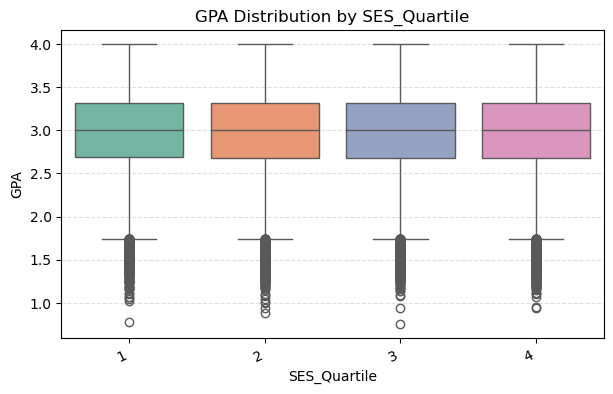

C:\Users\user\AppData\Local\Temp\ipykernel_12056\399920532.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='GPA', palette='Set2')


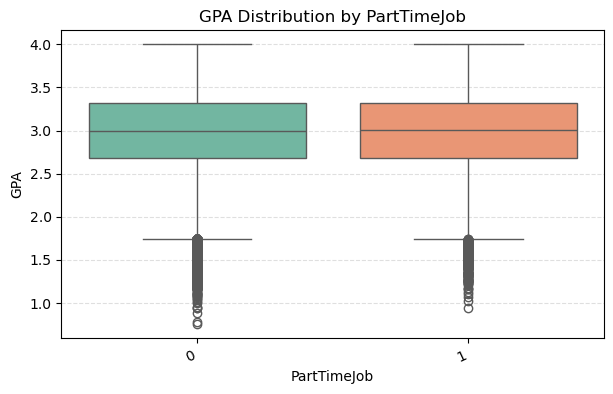

C:\Users\user\AppData\Local\Temp\ipykernel_12056\399920532.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='GPA', palette='Set2')


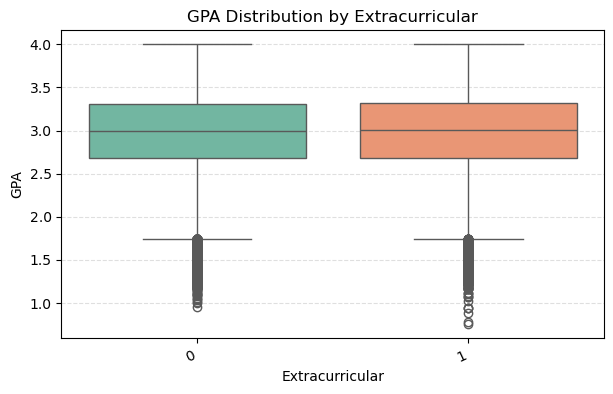

In [12]:
# Relationship between GPA, Demographic and Lifestyle factors
categorical_features = ['Gender', 'SchoolType', 'SES_Quartile', 'PartTimeJob', 'Extracurricular']

for col in categorical_features:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        sns.boxplot(data=df, x=col, y='GPA', palette='Set2')
        plt.title(f"GPA Distribution by {col}")
        plt.xlabel(col)
        plt.ylabel("GPA")
        plt.xticks(rotation=25, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.4)
        plt.show()

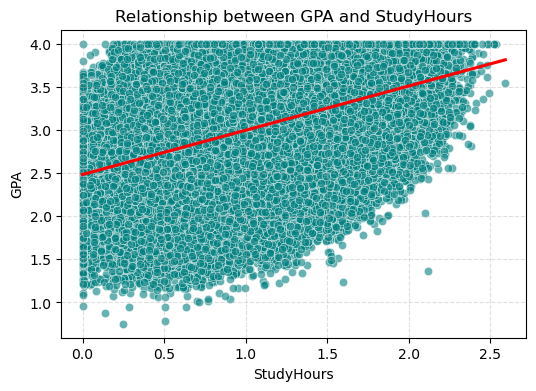

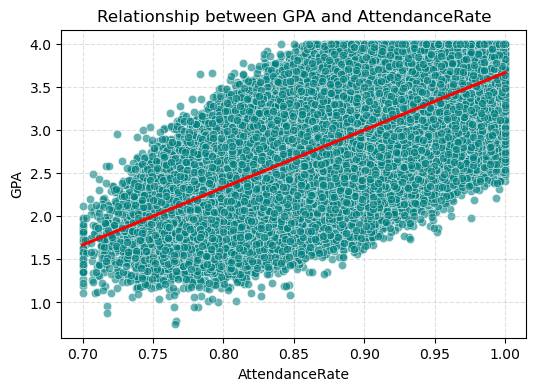

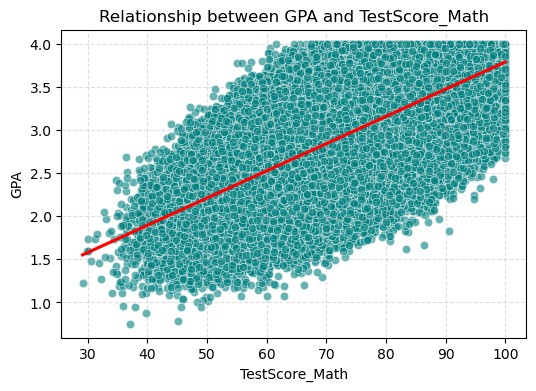

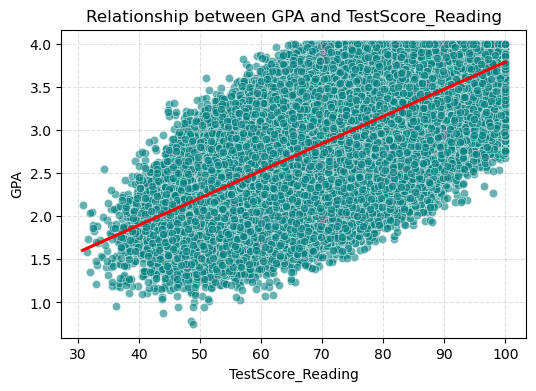

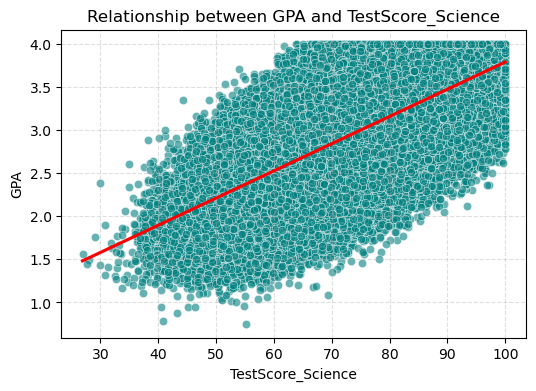

In [32]:
# Relationship between GPA and key numeric variables
numeric_factors = ['StudyHours', 'AttendanceRate', 'TestScore_Math', 'TestScore_Reading', 'TestScore_Science']

for col in numeric_factors:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=col, y='GPA', alpha=0.6, color='teal')
        sns.regplot(data=df, x=col, y='GPA', scatter=False, color='red', ci=None)
        plt.title(f"Relationship between GPA and {col}")
        plt.xlabel(col)
        plt.ylabel('GPA')
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()
